Using the gapminder_total dataset solve the following tasks with pandas.

1. Read in data:
df = pd.read_csv('../data/gapminder_total.csv')

2. What is the median population in the data set?

3. How often does each continent appear in the data set?

4. Which continent has the lowest average fertility rate overall?

5. What was the average life expectancy in Europe in 2015? 
Hint: first filter for 2015 then apply groupby.

6. How many countries does each continent have in the dataset?
Hint: filter for one year and count

7. What is the average population of a European country in 1976 compare to 2015?
Hint: once again filter for the year in question and do each year separately to compare

BONUS

8. What is the highest population a continent ever had?
Hint: group by multiple columns

9. Which continent had that population and in which year?
Hint: group by multiple columns and filter for the result from #6

In [2]:
import pandas as pd
df = pd.read_csv('../data/gapminder_total.csv')

In [9]:
#2. What is the median population in the data set?
print(f"The median poplutation is {df['population'].median()}")


The median poplutation is 5190648.5


In [7]:
#3. How often does each continent appear in the data set?
dic = dict(df.groupby(['continent']).size())
for conti in dic:
    print(f'{conti} appears in the data set {dic[conti]} times.')

Africa appears in the data set 3234 times.
Asia appears in the data set 2574 times.
Australia and Oceania appears in the data set 594 times.
Europe appears in the data set 2640 times.
North America appears in the data set 1254 times.
South America appears in the data set 792 times.


In [8]:
#3. How often does each continent appear in the data set?
df['continent'].value_counts()


continent
Africa                   3234
Europe                   2640
Asia                     2574
North America            1254
South America             792
Australia and Oceania     594
Name: count, dtype: int64

In [11]:
#4. Which continent has the lowest average fertility rate overall?
fertility_avg = df.groupby('continent')['fertility'].mean()
fertility_avg_min = fertility_avg.min()
for i, value in fertility_avg.items():
    if value == fertility_avg_min:
        print(i,'has the lowest fertility rate overall:', round(value,2))
        

Europe has the lowest fertility rate overall: 2.17


In [16]:
#4. Which continent has the lowest average fertility rate overall?
conti_low_fertility = df.groupby('continent')['fertility'].mean().idxmin()
lowest_fertility = df.groupby('continent')['fertility'].mean().min()
print(conti_low_fertility,'has the lowest fertility rate overall:', round(lowest_fertility,2))
        

Europe has the lowest fertility rate overall: 2.17


In [18]:
# 5. What was the average life expectancy in Europe in 2015? 
mask_2015 = df['year'] == 2015
life_expectancy_avg_2015 = df[mask_2015].groupby('continent')['life_expectancy'].mean()
print('The average life expectancy in Europe in 2015 is', round(life_expectancy_avg_2015['Europe'],1), 'years old.')

The average life expectancy in Europe in 2015 is 78.8 years old.


In [21]:
# 6. How many countries does each continent have in the dataset?
unique_countries_in_continent = df.groupby('continent')['country'].nunique()
for i, value in unique_countries_in_continent.items():
    print(f'There are {value} countries in {i}.')

There are 49 countries in Africa.
There are 39 countries in Asia.
There are 9 countries in Australia and Oceania.
There are 40 countries in Europe.
There are 19 countries in North America.
There are 12 countries in South America.


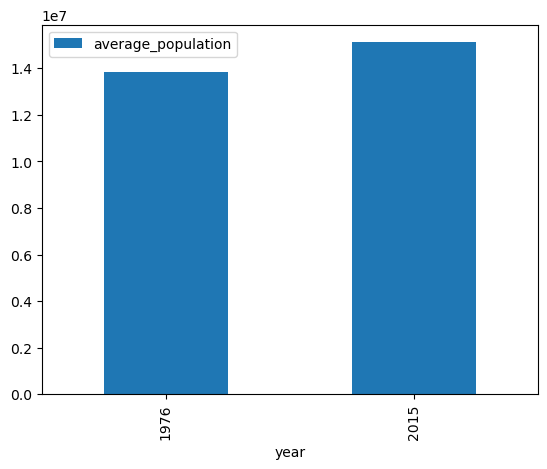

In [25]:
# 7. What is the average population of a European country in 1976 compare to 2015?
import matplotlib.pyplot as plt
mask_1976 = df['year'] == 1976
mask_2015 = df['year'] == 2015
p_avg_1976 = dict(df[mask_1976].groupby('continent')['population'].mean())
p_avg_2015 = dict(df[mask_2015].groupby('continent')['population'].mean())
# x = pd.DataFrame([[1976,2015],[p_avg_1976['Europe'],p_avg_2015['Europe']]])
# y = [p_avg_1976['Europe'],p_avg_2015['Europe']]
x = pd.DataFrame({'year':[1976,2015],'average_population':[p_avg_1976['Europe'],p_avg_2015['Europe']]})
x.plot(kind='bar', x='year');

In [98]:
# 8. What is the highest population a continent ever had?
df.groupby('continent')['population'].max()

continent
Africa                   1.822020e+08
Asia                     1.376049e+09
Australia and Oceania    2.396897e+07
Europe                   8.201018e+07
North America            3.217736e+08
South America            2.078475e+08
Name: population, dtype: float64

In [3]:
# 8. What is the highest population a continent ever had?
df.groupby(['continent','year'])['population'].sum().max()

np.float64(4271610225.0)

In [27]:
# 9. Which continent had that population and in which year?
df.groupby(['continent','year'])['population'].sum().idxmax()

('Asia', 2015)

In [21]:
df

,continent,country,year,life_expectancy,fertility,population
0,Africa,Algeria,1950,42.77,7.65,8872247.0
1,Africa,Algeria,1951,43.03,7.65,9039913.0
2,Africa,Algeria,1952,43.50,7.65,9216395.0
3,Africa,Algeria,1953,43.96,7.65,9405445.0
4,Africa,Algeria,1954,44.44,7.65,9609507.0
...,...,...,...,...,...,...
11083,South America,Venezuela,2011,74.80,2.44,29427631.0
11084,South America,Venezuela,2012,74.60,2.42,29854238.0
11085,South America,Venezuela,2013,74.70,2.39,30276045.0
11086,South America,Venezuela,2014,74.80,2.36,30693827.0
